# STAT 207 Project 02 - Sharks and Samples

Jihan Karim, Nishka Saxena, Sanika Pande

<hr>

### Contribution Report

Should we grade your submission?  If not, write the netID of the submission to be graded.  (Note: We will only grade one assignment per group, and we'll pick the first one that says we should grade that submission.  We will assign the same grade to all team members.)

*For example*, you might respond: **grade this submission** or **my submission is under netID jdeeke**

grade this submission

If you said **my submission is under netID** above, we will not grade any of your project submission.

If you said **grade this submission** above, who worked with you on this project?  Write both their **names** and **netIDs**.  

Sanika Pande (sanikap2)
Jihan Karin (jihank2)

You should list the contribution of each team member to the report.

*For example:*

*John Smith (smith92) & Jane Doe (doe105) worked together on all parts of this project*

OR

<i>1. John Smith (smith92) completed parts 1 - 3</i>

<i>2. Jane Doe (doe105) completed parts 4 - 5</i>

<i>We both reviewed the full document before submission.</i>

Jihan Karim (jihank2) completed parts 1 & 4,
Sanika Pande (sanikap2) completed part 3,
Nishka Saxena (nishkas3) completed part 2 & 4

Group Work Reflection

Reflecting on your experience working as a group, how do you think the project went?  What were the most effective things your group did to work together?  What were the least effective things your group did to work together?  What have you learned about group work from the last project?  What might you change about your group's process or dynamics for the next project?  Did you face any substantial challenges in working together?  If so, please explain any challenges that you had.

*Note*: this can be completed individually or as a group, and each person can submit their own reflection to their own repository/submission or completely within the group submission.  If you would like your TA to read your individual reflection and yours is not the submission to be graded, be sure to email your TA.

I think our overall experience working in a group was very positive. Our collaboration was effective because we scheduled a time to meet and work out the whole project in one go. We didn't have anything that wasn't effective, as we got it done in one sitting and were able to work through it with no challenges. We learned from the last project that us three are a good team, and we will most likely be working together on future projects. 

## 1. Introduction

**Dataset Introduction:** The dataset provides comprehensive analysis of companies that have appeared on the popular reality television show, Shark Tank. The show consists of entreprenuers pitching their business idea to a panel of investors, or sharks, in hopes of securing a deal that exchanges a share of the company for funding. The dataset includes information on company names, entrepreneurs, funding received, product descriptions, the sharks involved, and more.

**Populations and Samples:** The dataset represents a sample, not a full population. This is because not every single company that has been on the show is in our dataset. Our population of interest would be all entrepreneurial companies that have been on Shark Tank, while our dataset only contains a portion of companies. In addition, this dataset has information from Seasons 1-6; there have been more episodes aired since then.

**Research Questions:** What proportion of startups in this dataset received a deal on Shark Tank?

What are a range of reasonable values for the true proportion of all startups appearing on Shark Tank that receive a deal?

**Contextual Importance:** Exploring the proportion of startups that receive a deal on Shark Tank gives us insight into how comepetitive and selective the investment process can be. This can help both entrepreneurs and investors. For entrepreneurs, this can help them prepare for a business pitch and how likely they are going to get funded. For investors, this can illustrate decisions over time and how they should navigate future financial endeavors.

In [2]:
#Imports here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('shark_tank_companies.csv')
df.sample(5)

,deal,description,episode,category,entrepreneurs,location,website,askedfor,exchangeforstake,valuation,season,shark1,shark2,shark3,shark4,shark5,title,episode_season,multiple_entreprenuers
484,False,"Frameri answers the question, ""Why aren't your...",27,Men and Women's Accessories,Konrad Billetz and Kevin Habich,"Cincinnati, OH",https://frameri.com,150000,4,4285714,6,Lori Greiner,Robert Herjavec,Kevin O'Leary,Daymond John,Mark Cuban,Frameri,6-27,True
160,False,A massage therapy system in which the therapis...,1,Fitness Programs,Todd Miller,"Phoenix, AZ",http://www.bodywalking.com,100000,10,1000000,4,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Mark Cuban,Body Walking,4-1,False
298,False,Surprise Ride is a one-of-a-kind subscription ...,9,Toys and Games,NaN,"Washington, DC",http://www.surpriseride.com,110000,10,1100000,5,Lori Greiner,Robert Herjavec,Kevin O'Leary,Daymond John,Mark Cuban,Surprise Ride,5-9,False
382,True,Purpose-built and thoughtfully designed athlet...,1,Undergarments and Basics,NaN,"New York, NY",http://www.bombas.com,200000,5,4000000,6,Lori Greiner,Robert Herjavec,Kevin O'Leary,Daymond John,Mark Cuban,Bombas,6-1,False
493,False,Adriana Montano wants to open the first Cat Ca...,29,Entertainment,Adriana Montano,"Boca Raton, FL",http://gatocafeflorida.com,100000,20,500000,6,Lori Greiner,Kevin O'Leary,Daymond John,Mark Cuban,Nick Woodman,Gato Cafe,6-29,False


## 2. Confidence Interval Analytical Tasks

**Objective to Answer:** What proportion of startups in this dataset received a deal on Shark Tank?

What are a range of reasonable values for the true proportion of all startups appearing on Shark Tank that receive a deal?

In [4]:
df['deal'] = df['deal'].dropna()
df['deal'].value_counts(dropna=False)

deal
True     251
False    244
Name: count, dtype: int64

We made sure to drop any cases that do not have True or False listed for the 'deal' variable.

In [5]:
df_true = df[df['deal'] == True]
df_true.head()

,deal,description,episode,category,entrepreneurs,location,website,askedfor,exchangeforstake,valuation,season,shark1,shark2,shark3,shark4,shark5,title,episode_season,multiple_entreprenuers
1,True,Retail and wholesale pie factory with two reta...,1,Specialty Food,Tod Wilson,"Somerset, NJ",http://whybake.com/,460000,10,4600000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Mr. Tod's Pie Factory,1-1,False
2,True,Ava the Elephant is a godsend for frazzled par...,1,Baby and Child Care,Tiffany Krumins,"Atlanta, GA",http://www.avatheelephant.com/,50000,15,333333,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ava the Elephant,1-1,False
5,True,One of the first entrepreneurs to pitch on Sha...,2,Specialty Food,Susan Knapp,"Napa Valley, CA",http://www.aperfectpear.com,500000,15,3333333,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,A Perfect Pear,1-2,False
9,True,An educational record label and publishing hou...,2,Education,Mark Furigay,"Chicago, IL",NaN,250000,10,2500000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Classroom Jams,1-2,False
10,True,A battery-operated cooking device that siphons...,3,Kitchen Tools,Marian Cruz,"San Francisco, CA",NaN,35000,35,100000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Turbobaster,1-3,False


In [6]:
p = len(df_true)/len(df)
n = len(df)
print('proportion of true deals:', p)
print('sample size:', n)

proportion of true deals: 0.5070707070707071
sample size: 495


In [7]:
df['valuation'].describe()

count    4.950000e+02
mean     2.165615e+06
std      3.761971e+06
min      4.000000e+04
25%      4.400000e+05
50%      1.000000e+06
75%      2.000000e+06
max      3.000000e+07
Name: valuation, dtype: float64

From the numerical summary of the valuations of the companies, it looks like the mean value of a company that comes onto Shark Tank is $2,000,000. The highest valued company was at $30,000,000, and the lowest was at $40,000, which tells us that most of the companies are smaller companies. 

In [8]:
sample_stats = []

for i in range(5000):
    sample = df['deal'].sample(n=len(df), replace=True)
    sample_stats.append(sample.mean())

df_ci = pd.DataFrame(sample_stats)

lower = df_ci.quantile(0.05)
upper = df_ci.quantile(0.95)

(lower, upper)


(0    0.468687
 Name: 0.05, dtype: float64,
 0    0.545455
 Name: 0.95, dtype: float64)

Our Confidence Interval range was 0.471 to 0.5434. We are 90% confident that our true proportion of companies that secure a deal on Shark Tank falls into the range of 47.10% to 54.34% of the companies. 

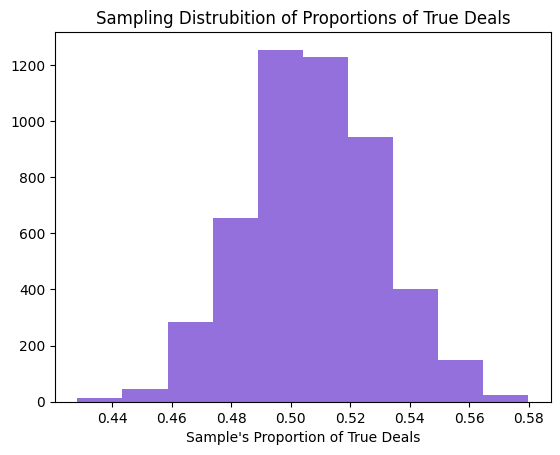

In [9]:
plt.hist(df_ci, color='mediumpurple')
plt.xlabel("Sample's Proportion of True Deals")
plt.title("Sampling Distrubition of Proportions of True Deals")
plt.show()

## 3. Hypothesis Testing Analytical Tasks

For our hypothesis test, we will look at the "exchangeforstake" variable, which describes the % stake offered to the sharks by the contestants. For the research question, we will look at what are the summary measures of the "exchangeforstake" variable in the dataset.

In [10]:
df['exchangeforstake'] = df['exchangeforstake'].dropna()
df.head()

,deal,description,episode,category,entrepreneurs,location,website,askedfor,exchangeforstake,valuation,season,shark1,shark2,shark3,shark4,shark5,title,episode_season,multiple_entreprenuers
0,False,Bluetooth device implant for your ear.,1,Novelties,Darrin Johnson,"St. Paul, MN",NaN,1000000,15,6666667,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ionic Ear,1-1,False
1,True,Retail and wholesale pie factory with two reta...,1,Specialty Food,Tod Wilson,"Somerset, NJ",http://whybake.com/,460000,10,4600000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Mr. Tod's Pie Factory,1-1,False
2,True,Ava the Elephant is a godsend for frazzled par...,1,Baby and Child Care,Tiffany Krumins,"Atlanta, GA",http://www.avatheelephant.com/,50000,15,333333,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ava the Elephant,1-1,False
3,False,"Organizing, packing, and moving services deliv...",1,Consumer Services,"Nick Friedman, Omar Soliman","Tampa, FL",http://collegehunkshaulingjunk.com/,250000,25,1000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,College Foxes Packing Boxes,1-1,False
4,False,Interactive media centers for healthcare waiti...,1,Consumer Services,Kevin Flannery,"Cary, NC",http://www.wispots.com/,1200000,10,12000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Wispots,1-1,False


In [11]:
df["exchangeforstake"].describe()

count    495.000000
mean      17.539394
std       10.061047
min        3.000000
25%       10.000000
50%       15.000000
75%       20.000000
max      100.000000
Name: exchangeforstake, dtype: float64

(array([185., 196.,  81.,  23.,   8.,   0.,   1.,   0.,   0.,   1.]),
 array([  3. ,  12.7,  22.4,  32.1,  41.8,  51.5,  61.2,  70.9,  80.6,
         90.3, 100. ]),
 <BarContainer object of 10 artists>)

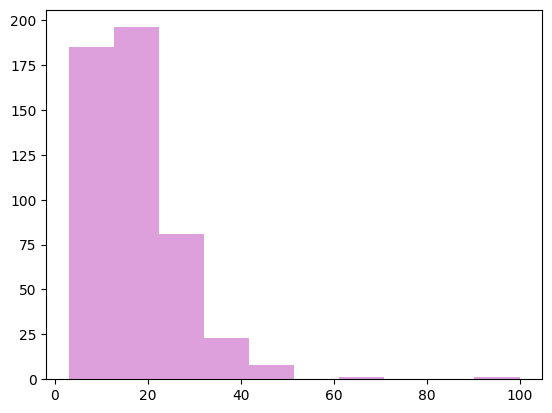

In [12]:
plt.hist(df['exchangeforstake'], color='plum')

The exchange for stake variable describes the percentage of company ownership the entrepeneur offers a stakeholder to own. The median of the exchange for stake variable in the Shark Tank dataset is 15%. This distribution's mean is around 17%, which is reflected by the skewed right shape of the histogram. The minimum value offered was 3% and the max is 100%. The max and other upper outliers is what seems to be skewing the distribution right. 

The most appropriate measure of center to describe this variable is the median because the distribution is right-skewed.

**Hypothesis Test**

We will be using the sample data(df) here as a stand-in for the population data. The median of the sample data is 15.

$H_0: M = 15$

$H_a: M < 15$

We are setting a significance level of $\alpha = 0.05$.

These samples are independent of each other, are representative of the population we are considering, have a sample size equal to the number of samples in the original dataset, and drawn with replacement.  

In [13]:
simulated_stats = []
for i in range(5000):
    df_sample = df.sample(n=len(df), replace=True)
    simulated_stats.append(df_sample["exchangeforstake"].median())
simulated_stats = pd.DataFrame({"median exchangeforstake value": simulated_stats})
simulated_stats

,median exchangeforstake value
0,15.0
1,18.0
2,15.0
3,15.0
4,15.0
...,...
4995,15.0
4996,15.0
4997,15.0
4998,15.0


In [14]:
sample_median = df["exchangeforstake"].median()
sample_median

np.float64(15.0)

In [15]:
p_value = (simulated_stats["median exchangeforstake value"] <= sample_median).mean()
p_value

np.float64(0.9066)

Assuming that the true median is 15, there is a 90.22% chance of obtaining a sample median that is less than or equal to the observed sample mean. Because this p value is greater than the significance level, we fail to reject the null hypothesis. There is not sufficient evidence to suggest that the true median is less than 15.

## 4. Conclusion

**Summarization:** Based on our analysis, the 90% CI for the proportion of companies that received a deal on Shark Tank ranges from 0.471 to 0.5434. This indicates that we are 90% confident that the true proportion of startups securing a deal lies between 47.10% and 54.34%. Additionally, our hypothesis test produced a p-value of 0.903. We can assume that the median number of companies that receive a deal on Shark Tank in one season is around 15. This is much greater than our significance value, 0.05. As a result, we fail to reject the null hypothesis; there is not enough information to conclude that the true median is different from our hypothesized value.

**Limitations:** Regarding our data, we didn't face challenges in terms of cleaning or handling it, as there weren't troublesome variables or many rows of data we had to drop to use this datast. However, there are a few limitations to this analysis that affect how strongly we can interpret the results. First, this dataset only contains Season 1 though 6 of the show Shark Tank. This means that in later seasons, there could be newer features of the show, and due to its high popularity, it might become harder to secure a deal on Season 7 than it was during Season 1, when the show was just starting to air. Additionally, there could be potential bias for what entrepreneurs are offered deals, as some companies could be more "popular" or create drama that attract more viewers to the show. This could affect the entrepreneurs that are looking to pitch their deal on Shark Tank as it would give them more insight towards their chances of securing a deal, but they would still need to conside media and popularity-centered bias. As for investors, they would have a better idea of what kinds of deals are pitched, and whether or not they would be successful.


**Future Work:** Future projects could explore which industry type is likely to get a deal. This would explore if a specific industry is more likely to secure a deal over another industry. Another direction is tracking the success of the company after appearing on the show. Have companies that secured a deal gone to do better than companies that did not secure a deal? Although our dataset does not have company information after going on the show, this is an interesting topic that researchers can explore. In addition, comparing different seasons or international versions of Shark Tank could provide insights into how investor behavior and startup trends vary across time and regions.